## Stock Price Prediction

### Importing necessary libraries

# Importing necessary libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Downloading stock data for the last 10 years

In [3]:
start = '2014-01-19'
end = '2023-12-30'

stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-21,28.914869,28.991333,28.675018,28.983862,28.983862,79492846
2014-01-22,29.056339,29.088221,28.863314,29.016739,29.016739,63091600
2014-01-23,28.891706,28.953724,28.751482,28.894197,28.894197,78256228
2014-01-24,28.667795,28.731058,27.970161,27.990833,27.990833,156283602
2014-01-27,28.047373,28.057335,26.955713,27.427942,27.427942,174796734
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400


### Resetting the index of the data

In [5]:
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-21,28.914869,28.991333,28.675018,28.983862,28.983862,79492846
1,2014-01-22,29.056339,29.088221,28.863314,29.016739,29.016739,63091600
2,2014-01-23,28.891706,28.953724,28.751482,28.894197,28.894197,78256228
3,2014-01-24,28.667795,28.731058,27.970161,27.990833,27.990833,156283602
4,2014-01-27,28.047373,28.057335,26.955713,27.427942,27.427942,174796734
...,...,...,...,...,...,...,...
2499,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2500,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2501,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
2502,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


### Calculating moving averages for 100 days

In [7]:
ma_100_days = data.Close.rolling(100).mean()

### Visualizing the moving average for 100 days

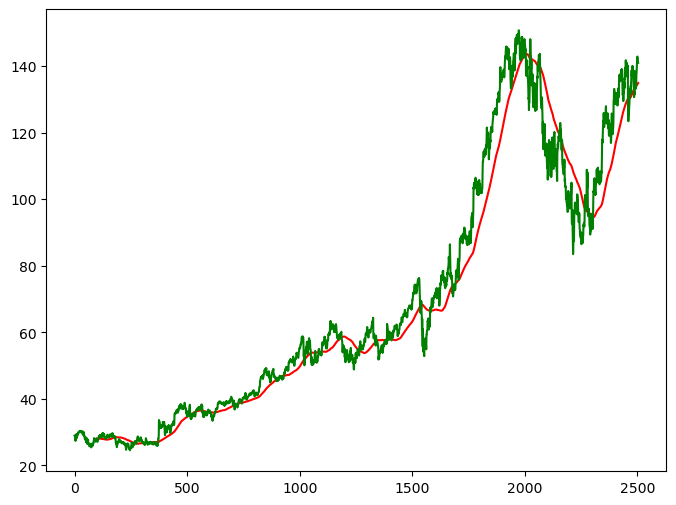

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

### Calculating moving averages for 200 days

In [9]:
ma_200_days = data.Close.rolling(200).mean()

### Visualizing the moving averages for 100 and 200 days

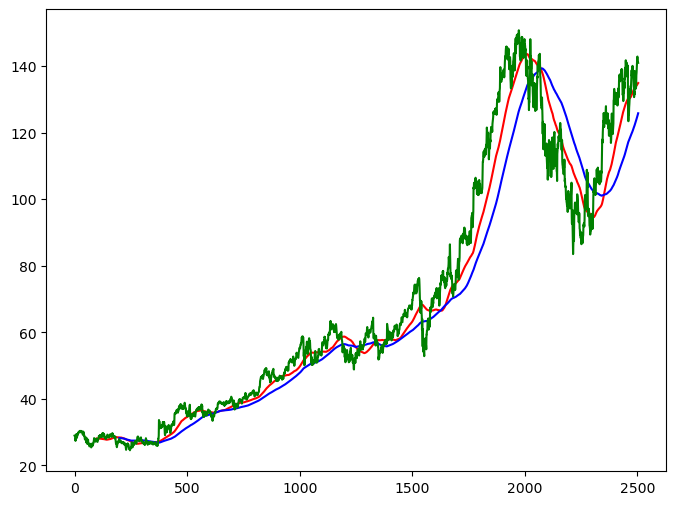

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

We have removed any null values in the data using dropna function

### Removing any null values in the data

In [11]:
data.dropna(inplace=True)

### Splitting data into training and test sets in an 80/20 ratio

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2003

In [14]:
data_test.shape[0]

501

### Scaling the training data between 0 and 1 using MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

We have applied the scalar to training data set

In [16]:
data_train_scale = scalar.fit_transform(data_train)

 ### Preparing data for training by creating input sequences and corresponding labels

In [42]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])


converting the input data to arrays

In [43]:
x, y  = np.array(x), np.array(y)

In [19]:
#pip install --upgrade keras


### Building the LSTM model

In [20]:
from keras.layers  import  Dense, Dropout, LSTM
from keras.models import Sequential 

In [44]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


/Users/aabhi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the model

In [46]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - loss: 0.0564
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - loss: 0.0076
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0046
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 0.0050
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - loss: 0.0049
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 0.0039
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - loss: 0.0043
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.0039
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.0044
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - loss: 0.0044
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0041
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 0.0036
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0032
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - loss: 0.0033
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/ste

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [48]:
pas_100_days = data_train.tail(100)

In [49]:
data_test = pd.concat([pas_100_days, data_test],ignore_index=True)

In [51]:
data_test_scale = scalar.fit_transform(data_test)

In [54]:

x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [55]:
y_predict = model.predict(x)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [64]:
scale = 1/scalar.scale_

In [65]:
y_predict = y_predict*scale

In [66]:
y = y*scale

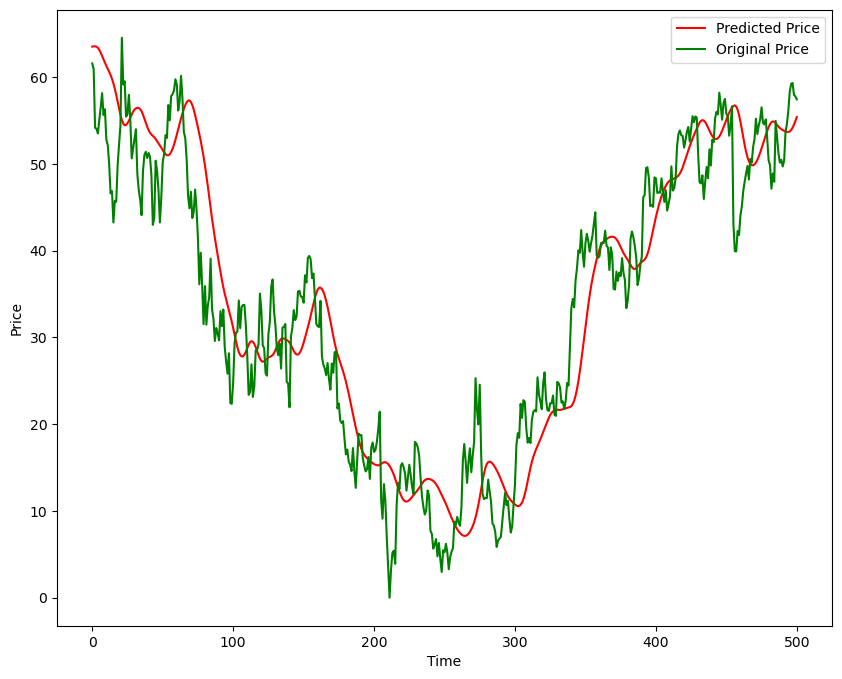

In [69]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


### Saving the trained model

In [72]:
model.save('StockPredictionsModel.keras')